### Polynomial Linear Regression 


Polynomial regression is a form of regression analysis in which the relationship between the independent variable `x` and the dependent variable `y` is modelled as an `n`th degree polynomial in `x`.

<a href="https://imgur.com/VWhAziI"><img src="https://i.imgur.com/VWhAziI.png" title="source: imgur.com" /></a> 


We use a polynomial regression when the **straight line** (like in Linear Regression) doesn’t fit well our obervations and we want to obtain parabolic effect:

<a href="https://imgur.com/yUffONM"><img src="https://i.imgur.com/yUffONM.png" title="source: imgur.com" /></a>  

Reference: [Polynomial Regression](https://medium.com/data-py-blog/polynomial-linear-regression-1f8117f6de2e)

Let's take an example to explain Polynomial Regression.

Here we have data of Salary of employees based on their designation.We will be using varies  regression methods to  predict the salary of an employee.This is a work in process and please do vote if you like my work.  
Reference: [Machine Learning A-Z™: Hands-On Python & R In Data Science](https://www.udemy.com/machinelearning/)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output. 

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

['Position_Salaries.csv']


In [2]:
# We can see that the dataset has 10 levels and the corresponding salary paid to the employee
dataset = pd.read_csv("../input/Position_Salaries.csv")
dataset 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# For the features we are selecting all the rows of column Level 
# represented by column position 1 or -1 in the data set.
X=dataset.iloc[:,1:2].values  

# for the target we are selecting only the salary column which 
#can be selected using -1 or 2 as the column location in the dataset
y=dataset.iloc[:,2].values   
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Position and the Level of the employee represent the same thing.So in out machine learning model it is sufficient to consider only on feature.In this case we can select the column Level. 

We will not be splitting the dataset as here we have only 10 data points.So we can consider all the values for out training purpose.

We need not use feature scaling for this particular model 

#### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Ploynomial Linear Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Visualizing Linear Regression result

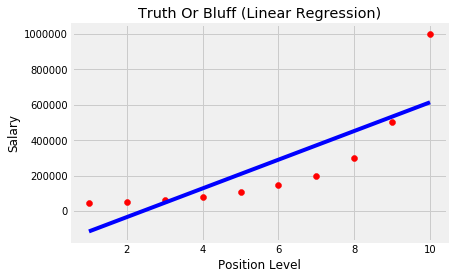

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth Or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualizing Plolynomial Linear Regression result

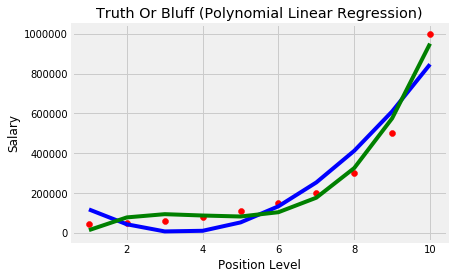

In [8]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

We can clearly see that the Polynimal Linear Regression model has much better result compared to Linear Regression Model.As we increase the degree of the polynomial regression the correlation increases.4th degree Polynomial Linear Regression will gives us the best correlation for salary data.

**6.3 Smoothing out the curve using more points on X axis**

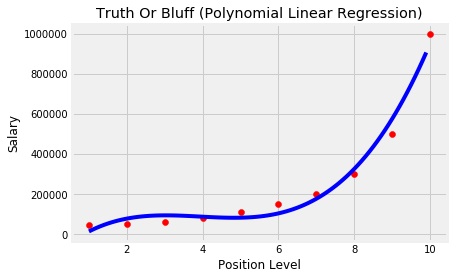

In [9]:
X_grid=np.arange(min(X),max(X),0.1) # This will give us a vector.We will have to convert this into a matrix 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_3.predict(poly_reg3.fit_transform(X_grid)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

We can see that by increasing the number of points in the X we can smooth out the curve.

**7. Predicting the salrary of the employee **

In [10]:
lin_reg.predict([[6.5]])  # We are assuming the level of the employee is 6.5

array([330378.78787879])

In [11]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [12]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

We can see that the linear regression predicted values if higher.So this is not a good model.We can see that Polynomial Linear regression has better prediction.Accuracy of Polynomial Linear regression increases with the increase in the degree of the Polynomial.